    A fictional employee attributes dataset created by IBM is used for this exploratory data analysis project. The Excel file includes salient information relating to employment, such as tenure, frequency of trainings, and years since last promotion, as well as personal characteristics such as reported work-life balance, job satisfaction, and distance from home. 
    
    Our goal with this project is to explore whether employee attrition (whether or not the employee stayed with the organization) is related to certain attributes, so that we can advise the management team on what practices and characteristics may be predictive of future attrition. 
    
    Kaggle Link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [125]:
#First, we will read the file from Excel, and check to make sure everything looks good.

data_file = pd.read_excel("IBM_Employee_Data.xls")

data_file.shape

(1470, 35)

In [126]:
data_file.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [101]:
#Checking for any null values. 

data_file.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [102]:
#Checking for any duplicated rows. 

dup_rows = data_file[data_file.duplicated()]
print(dup_rows.count())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [103]:
#Now that we've confirmed no further data cleaning is necessary, we will next create a new column where Attrition 
#values are converted to integers, so that it is possible to calculate pairwise correlation coefficients with other 
#variables in the dataset. 

data_file["Attrition_Numerals"] = data_file["Attrition"].map({"Yes": 1,"No": 0})

data_file.head()

#Reference link: https://www.geeksforgeeks.org/replace-the-column-contains-the-values-yes-and-no-with-true-and-false-in-python-pandas/

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Numerals
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [104]:
#Now, we calculate pairwise Pearson's r correlations for each column with Attrition_Numerals, allowing us to identify 
#specific attributes that may be significantly related to employee turnover.

data_file.corrwith(data_file["Attrition_Numerals"], axis = 0, drop = False, method = "pearson")

#Reference link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html

Age                        -0.159205
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
Attrition_Numerals          1.000000
d

<AxesSubplot:>

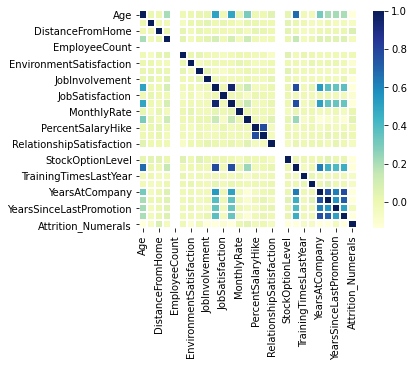

In [105]:
#Alternatively, we can plot these correlational values in a heatmap for a more condensed representation. 

sns.heatmap(data_file.corr(), robust = True, cmap="YlGnBu", square = True, linewidths = .5)

#Reference link: https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [106]:
#Based on our Pearson's r calculations above, I am intersted in how Job Level, Total Working Years, Years in Current
#Role, and Years with Current Manager are related to employee attrition. I personally am also interested in how 
#Job Involvement, Job Satisfaction, Training Times Last Year, and Work Life Balance are related to employee attrition.

#First, we will export these columns of interest to a new dataframe, so that we do not have to deal with extraneous 
#data we don't plan to use. 

new_frame = data_file[["Attrition", "JobInvolvement", "JobLevel", "JobSatisfaction", "TotalWorkingYears",
                "TrainingTimesLastYear", "WorkLifeBalance", "YearsInCurrentRole", "YearsWithCurrManager",
                "Attrition_Numerals"]].copy()

new_frame.head()


,Attrition,JobInvolvement,JobLevel,JobSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager,Attrition_Numerals
0,Yes,3,2,4,8,0,1,4,5,1
1,No,2,2,2,10,3,3,7,7,0
2,Yes,2,1,3,7,3,3,0,0,1
3,No,3,1,3,8,3,3,7,0,0
4,No,3,1,2,6,3,3,2,2,0


In [107]:
#Next, we will create new columns to store the values in "Job Involvement", "Job "Level", "Job Satisfaction", and 
#"Work Life Balance" with more easily intepretable labels. 

new_frame["JobInvolvement_Cat"] = new_frame["JobInvolvement"].map({1: "Low", 2: "Medium", 3: "High", 4: "Very High"})
new_frame["JobLevel_Cat"] = new_frame["JobLevel"].map({1: "Entry", 2: "Associate", 3: "Senior", 4: "Manager", 5: "Executive"})
new_frame["JobSatisfaction_Cat"] = new_frame["JobSatisfaction"].map({1: "Low", 2: "Medium", 3: "High", 4: "Very High"})
new_frame["WorkLifeBalance_Cat"] = new_frame["WorkLifeBalance"].map({1: "Bad", 2: "Good", 3: "Better", 4: "Best"})

new_frame.head()

,Attrition,JobInvolvement,JobLevel,JobSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager,Attrition_Numerals,JobInvolvement_Cat,JobLevel_Cat,JobSatisfaction_Cat,WorkLifeBalance_Cat
0,Yes,3,2,4,8,0,1,4,5,1,High,Associate,Very High,Bad
1,No,2,2,2,10,3,3,7,7,0,Medium,Associate,Medium,Better
2,Yes,2,1,3,7,3,3,0,0,1,Medium,Entry,High,Better
3,No,3,1,3,8,3,3,7,0,0,High,Entry,High,Better
4,No,3,1,2,6,3,3,2,2,0,High,Entry,Medium,Better


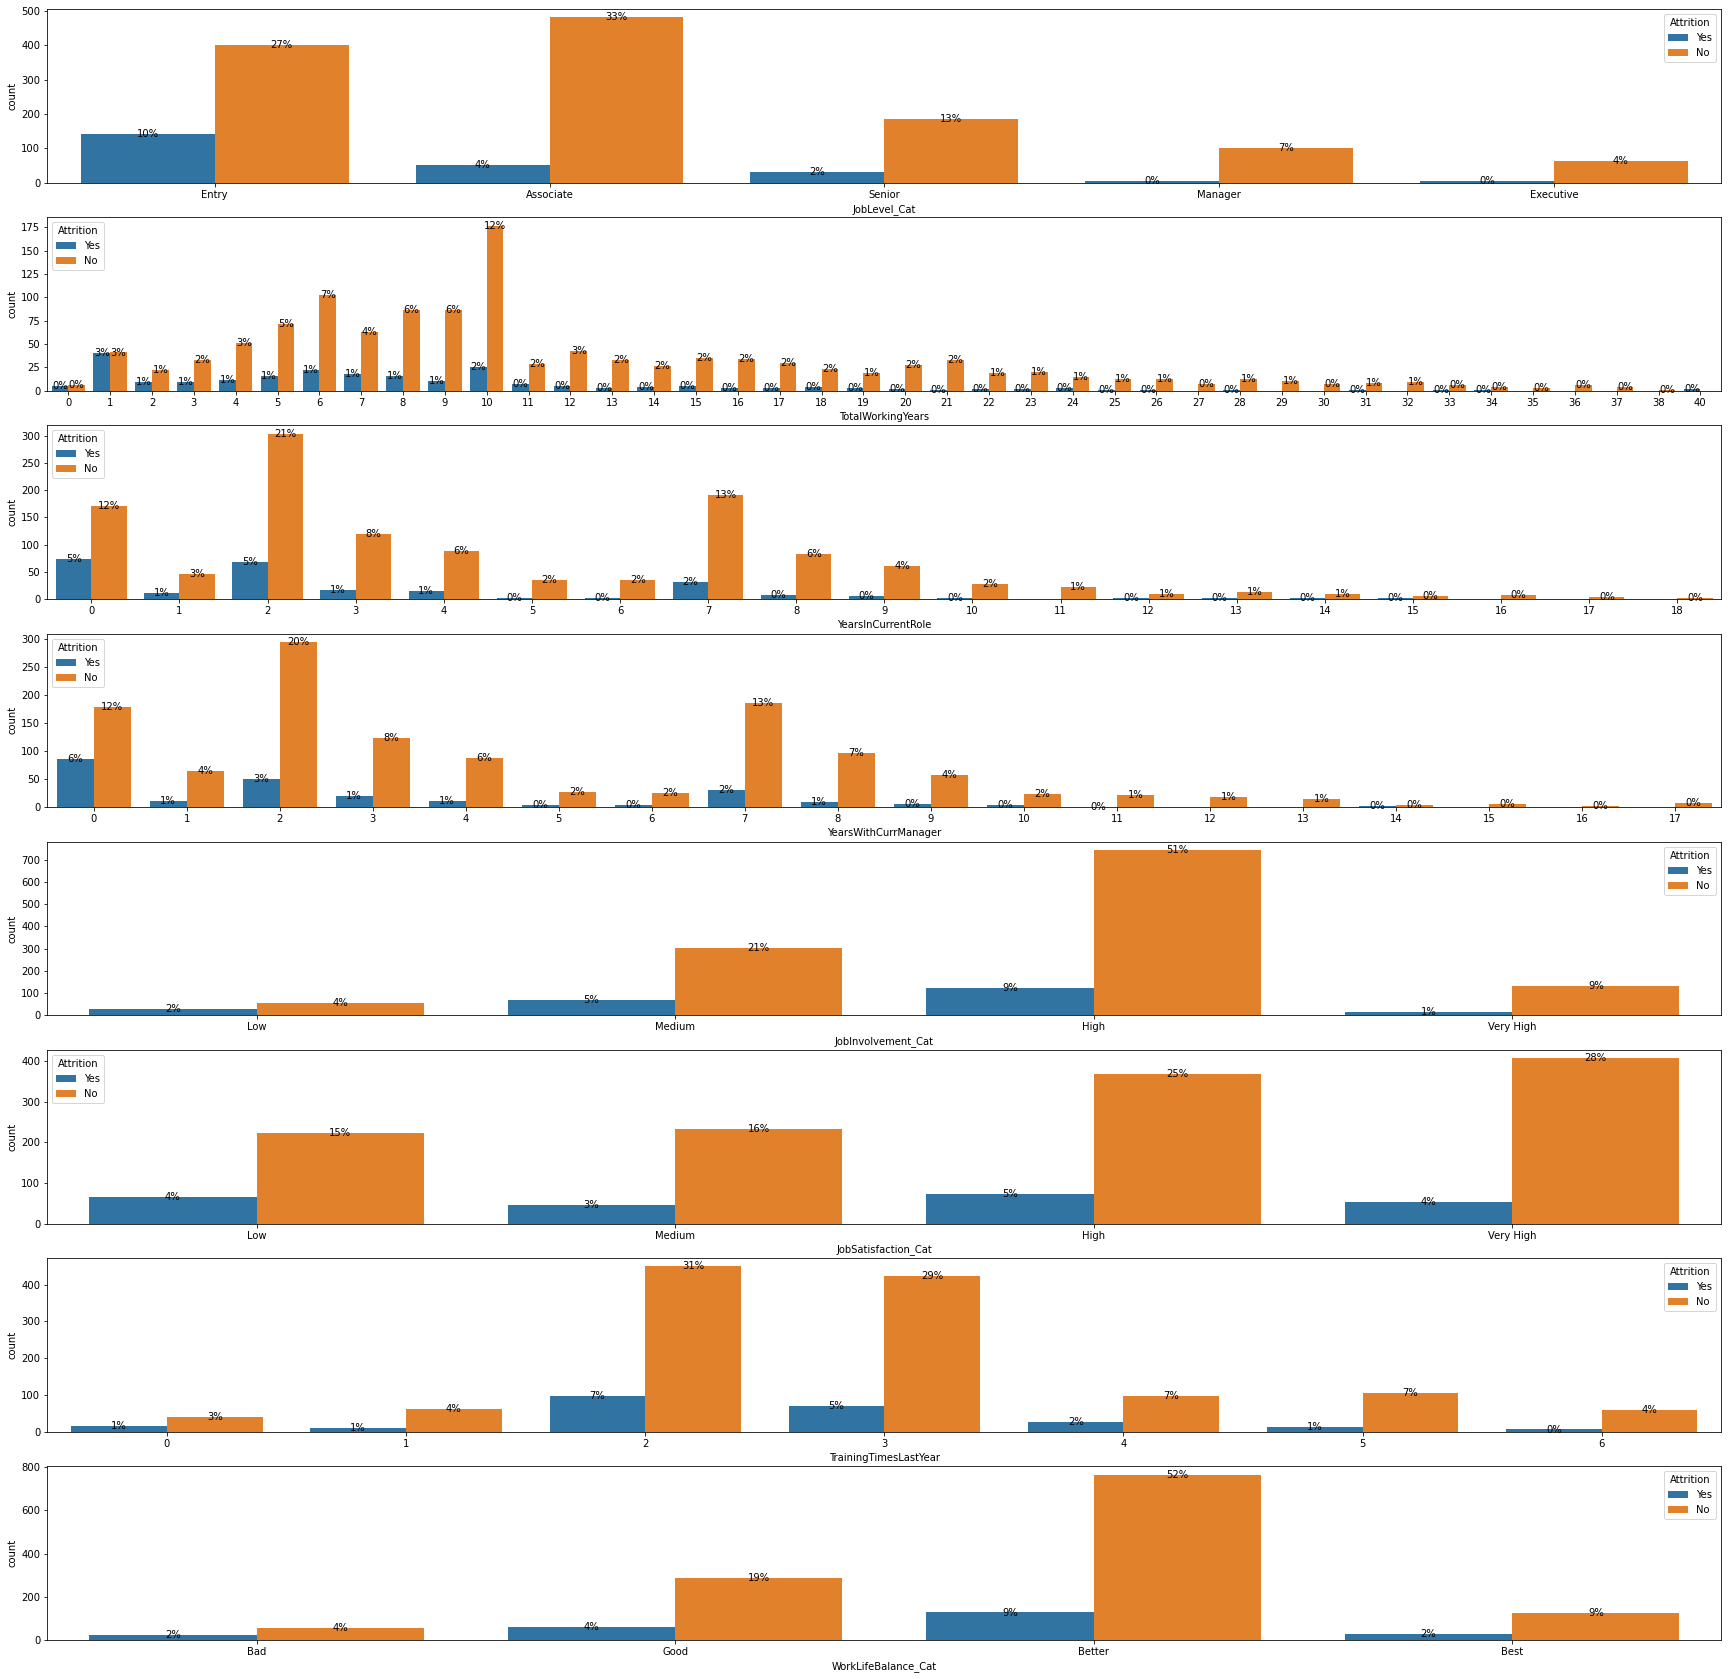

In [108]:
#Now, we can plot our data on barcharts, using the colors blue and orange to represent rates of attrition. This 
#should help visualize trends in attrition rates based on our variables of interest. It may be also be helpful to 
#annotate these graphs with percentages as opposed to raw numerical values, as this will allow for faster and 
#more scaled interpretation by readers. 

plt.figure(figsize = [30,30]) #Specifying figure sizes 

plt.subplot(8,1,1)
graph = sns.countplot(x = new_frame["JobLevel_Cat"], order = ("Entry", "Associate", "Senior", "Manager", "Executive"), hue = new_frame["Attrition"]) #Creating the bar chart, assigned to the variable name graph
for percent in graph.patches:
    height = percent.get_height()
    graph.annotate('{:.0%}'.format(height / len(new_frame.index) #Annotating bars with their percentage of total values in dataframe
                                  ), (percent.get_x()+.5*percent.get_width(), percent.get_y() + height + 0.01), ha = 'center', va = 'center')

#We will use similar syntax below for our additional variables of interest. 
    
plt.subplot(8,1,2)
graph = sns.countplot(x = new_frame["TotalWorkingYears"],hue = new_frame["Attrition"])
for percent in graph.patches:
    height = percent.get_height()
    graph.annotate('{:.0%}'.format(height / len(new_frame.index)
                                  ), (percent.get_x()+.5*percent.get_width(), percent.get_y() + height + 0.01), ha = 'center', va = 'center')
plt.subplot(8,1,3)
graph = sns.countplot(x = new_frame["YearsInCurrentRole"],hue = new_frame["Attrition"])
for percent in graph.patches:
    height = percent.get_height()
    graph.annotate('{:.0%}'.format(height / len(new_frame.index)
                                  ), (percent.get_x()+.5*percent.get_width(), percent.get_y() + height + 0.01), ha = 'center', va = 'center')
plt.subplot(8,1,4)
graph = sns.countplot(x = new_frame["YearsWithCurrManager"],hue = new_frame["Attrition"])
for percent in graph.patches:
    height = percent.get_height()
    graph.annotate('{:.0%}'.format(height / len(new_frame.index)
                                  ), (percent.get_x()+.5*percent.get_width(), percent.get_y() + height + 0.01), ha = 'center', va = 'center')
plt.subplot(8,1,5)
graph = sns.countplot(x = new_frame["JobInvolvement_Cat"], order = ("Low", "Medium", "High", "Very High"), hue = new_frame["Attrition"])
for percent in graph.patches:
    height = percent.get_height()
    graph.annotate('{:.0%}'.format(height / len(new_frame.index)
                                  ), (percent.get_x()+.5*percent.get_width(), percent.get_y() + height + 0.01), ha = 'center', va = 'center')
plt.subplot(8,1,6)
graph = sns.countplot(x = new_frame["JobSatisfaction_Cat"], order = ("Low", "Medium", "High", "Very High"), hue = new_frame["Attrition"])
for percent in graph.patches:
    height = percent.get_height()
    graph.annotate('{:.0%}'.format(height / len(new_frame.index)
                                  ), (percent.get_x()+.5*percent.get_width(), percent.get_y() + height + 0.01), ha = 'center', va = 'center')
plt.subplot(8,1,7)
graph = sns.countplot(x = new_frame["TrainingTimesLastYear"],hue = new_frame["Attrition"])
for percent in graph.patches:
    height = percent.get_height()
    graph.annotate('{:.0%}'.format(height / len(new_frame.index)
                                  ), (percent.get_x()+.5*percent.get_width(), percent.get_y() + height + 0.01), ha = 'center', va = 'center')
plt.subplot(8,1,8)
graph = sns.countplot(x = new_frame["WorkLifeBalance_Cat"], order = ("Bad", "Good", "Better", "Best"), hue = new_frame["Attrition"])
for percent in graph.patches:
    height = percent.get_height()
    graph.annotate('{:.0%}'.format(height / len(new_frame.index)
                                  ), (percent.get_x()+.5*percent.get_width(), percent.get_y() + height + 0.01), ha = 'center', va = 'center')
    
plt.show()

#Reference link 1: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
#Reference link 2: https://seaborn.pydata.org/generated/seaborn.countplot.html
#Reference link 3: https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

Now that we have been able to identify some interesting trends in the dataset, including an apparent steep drop in employment numbers after the 10 years of total working experience mark, it may be interesting to assess the percentage of variance in attrition based on our variables of interest, using simple linear regression. 

In [109]:
x = np.array(new_frame["JobLevel"]).reshape((-1, 1)) #Assigning x and y variables to NumPy arrays, and reshaping X so that it is formatted as a 2D array. 
y = np.array(new_frame["Attrition_Numerals"])

model = LinearRegression().fit(x, y) #Fitting the model with our variables above using the linear regression function.

CoD = model.score(x, y) #Assigning the coefficient of determination value to the variable name CoD.
print("The percent of variance in attrition accounted for by job level is", CoD * 100, "percent.")

#We can use similar syntax for our remaining variables of interest.

x = np.array(new_frame["TotalWorkingYears"]).reshape((-1, 1)) 

model = LinearRegression().fit(x, y)

CoD = model.score(x, y) 
print("The percent of variance in attrition accounted for by total working years is", CoD * 100, "percent.")

x = np.array(new_frame["YearsInCurrentRole"]).reshape((-1, 1)) 
y = np.array(new_frame["Attrition_Numerals"])

model = LinearRegression().fit(x, y)

CoD = model.score(x, y) 
print("The percent of variance in attrition accounted for by years in current role is", CoD * 100, "percent.")

x = np.array(new_frame["YearsWithCurrManager"]).reshape((-1, 1)) 
y = np.array(new_frame["Attrition_Numerals"])

model = LinearRegression().fit(x, y)

CoD = model.score(x, y) 
print("The percent of variance in attrition accounted for by years with current manager is", CoD * 100, "percent.")

x = np.array(new_frame["JobInvolvement"]).reshape((-1, 1)) 
y = np.array(new_frame["Attrition_Numerals"])

model = LinearRegression().fit(x, y)

CoD = model.score(x, y) 
print("The percent of variance in attrition accounted for by job involvement is", CoD * 100, "percent.")

x = np.array(new_frame["JobSatisfaction"]).reshape((-1, 1)) 
y = np.array(new_frame["Attrition_Numerals"])

model = LinearRegression().fit(x, y)

CoD = model.score(x, y) 
print("The percent of variance in attrition accounted for by job satisfaction is", CoD * 100, "percent.")

x = np.array(new_frame["TrainingTimesLastYear"]).reshape((-1, 1)) 
y = np.array(new_frame["Attrition_Numerals"])

model = LinearRegression().fit(x, y)

CoD = model.score(x, y) 
print("The percent of variance in attrition accounted for by training times in the past year is", CoD * 100, "percent.")

x = np.array(new_frame["WorkLifeBalance"]).reshape((-1, 1)) 
y = np.array(new_frame["Attrition_Numerals"])

model = LinearRegression().fit(x, y)

CoD = model.score(x, y) 
print("The percent of variance in attrition accounted for by work life balance is", CoD * 100, "percent.")

#Reference Link: https://realpython.com/linear-regression-in-python/

The percent of variance in attrition accounted for by job level is 2.8596416787444956 percent.
The percent of variance in attrition accounted for by total working years is 2.926263417866337 percent.
The percent of variance in attrition accounted for by years in current role is 2.577469839531632 percent.
The percent of variance in attrition accounted for by years with current manager is 2.4398226288136815 percent.
The percent of variance in attrition accounted for by job involvement is 1.6904149018993175 percent.
The percent of variance in attrition accounted for by job satisfaction is 1.0708343452512814 percent.
The percent of variance in attrition accounted for by training times in the past year is 0.3537608521118174 percent.
The percent of variance in attrition accounted for by work life balance is 0.4088201759070209 percent.


It should be noted that alternatives to attrition prediction exist. The survival analysis, or using regression to assess the likelihood of an employee still working for the organization after specific lengths of time, is a popular approach to this statistical analysis. However, without data relating to the length of time employees spent with the organization (outside years spent in current role), this approach does not fit our case. 

It seems that job level and total working years account for a relatively high percentage of variance in attrition rates. Further examination of these attributes for identifiable trends, such as the apparent drop in employee counts with more than 10 years of total working experience, could provide insight on antecedents to attrition.